In [1]:
import numpy as np
import pandas as pd
from scipy.optimize import minimize
import matplotlib.pyplot as plt

In [2]:
#define NSS fxn

def NelsonSiegelSvensson(params, maturities):
    beta0, beta1, beta2, beta3, tau1, tau2 = params
    y = beta0 + \
        beta1 * (1 - np.exp(-maturities / tau1)) / (maturities / tau1) + \
        beta2 * ((1 - np.exp(-maturities / tau1)) / (maturities / tau1) - np.exp(-maturities / tau1)) + \
        beta3 * ((1 - np.exp(-maturities / tau2)) / (maturities / tau2) - np.exp(-maturities / tau2))
    return y

In [3]:
#define error fxn

def error_function(params, maturities, observed_yields):
    predicted_yields = NelsonSiegelSvensson(params, maturities)
    return np.sum((observed_yields - predicted_yields) ** 2)

In [11]:
#data from 2-4-25

maturities = np.array([1/12, 2/12, 3/12, 4/12, 6/12, 1, 2, 3, 5, 7, 10, 20, 30])
observed_yields = np.array([4.37, 4.38, 4.34, 4.35, 4.28, 4.20, 4.26, 4.28, 4.35, 4.45, 4.54, 4.82, 4.77])

In [9]:
#optimize params

initial_params = [0.05, -0.02, 0.01, -0.01, 1, 2]  # initial guess for params
result = minimize(error_function, initial_params, args=(maturities, observed_yields), method='Nelder-Mead')
optimal_params = result.x

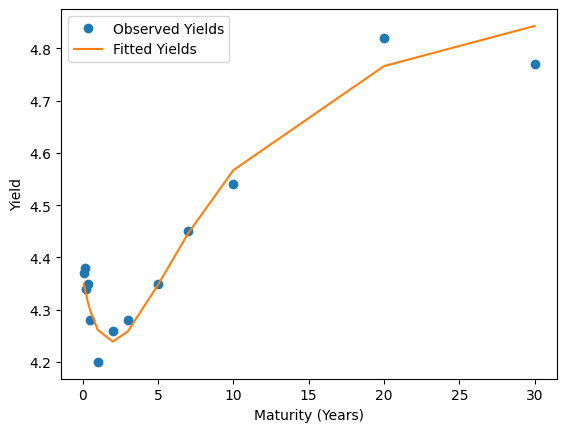

In [10]:
fitted_yields = NelsonSiegelSvensson(optimal_params, maturities)

plt.plot(maturities, observed_yields, 'o', label='Observed Yields')
plt.plot(maturities, fitted_yields, '-', label='Fitted Yields')
plt.xlabel('Maturity (Years)')
plt.ylabel('Yield')
plt.legend()
plt.show()